## Anotações
- 

---
# PO-240: Análise Exploratória de Dados (em R)

In [1]:
library(tidyverse)
library(e1071)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
dataset <- read_delim('KaggleDatasets/RAW/201702.csv',
                    delim = ',',
                    col_types = cols(.default = col_character()))
head(dataset)

id,date,input_0,input_1,input_2,input_3,input_4_1,input_5_1,input_6_1,input_7_1,⋯,output_7_6,output_8_6,output_9_6,output_10_6,output_11_6,output_12_6,output_13_6,output_14_6,output_15_6,output_16_6
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
56644,2017-02-01,4,0,213,62,1.6424768819072737,-0.2061379304602609,0.5476865082748057,1.4819018354627609,⋯,2.629011393889733,4.1329329674124216,-0.3104992901912986,0.9743337367530188,1.3434311461264823,0.3467226397864691,-0.1118013762705556,1.0268074305506074,2.651588998246869,5.5269155247799135
56707,2017-02-01,4,1,213,62,-0.026259083781485098,-0.2061379304602609,-0.653849633094415,-0.6177520482962079,⋯,-0.3879496595623725,-0.6147129579692565,-0.3104992901912986,-0.7658699291467284,-0.6853365604529069,-0.9933897693107572,-0.1118013762705556,-0.3192063289381105,-0.2233670163881996,-0.37920852268204497
56770,2017-02-01,4,2,213,62,-0.503290412193036,-0.2061379304602609,-0.05308156240980468,-0.6177520482962079,⋯,-0.7231675543903843,-0.6147129579692565,-0.3104992901912986,-0.6320081086929017,-0.7796978491310183,-0.6955870117335958,-0.1118013762705556,-0.12691864901115074,-0.5108626178517064,-0.37920852268204497
56833,2017-02-01,4,3,213,62,-0.6518166499768523,-0.2061379304602609,-0.653849633094415,-0.6177520482962079,⋯,-0.5555586069763785,-0.6147129579692565,-0.3104992901912986,-0.8328008393736418,-0.8740591378091294,-0.9189390799164671,-0.1118013762705556,-0.3192063289381105,-0.5108626178517064,-0.37920852268204497
43272,2017-02-01,11,0,185,134,0.3791301769931663,-0.24725659565925545,0.11146190732774276,0.25621788029436066,⋯,3.0880396587169683,1.3153777763203105,0.8142933484897504,0.5166829186826187,1.4532498646640164,0.5299821645361089,-0.16569383118169775,0.8612352425307161,2.5987816469684293,-0.5936150011328413
43333,2017-02-01,11,1,185,134,-0.4928062071730019,-0.24725659565925545,-0.6934897070094593,-0.7103922107386279,⋯,-0.6300500715452496,-0.7716158700909623,-0.4255461183880387,-0.8555406950876155,-1.0228800570354903,-1.140925451520567,-0.16569383118169775,-0.8154091498746274,-0.3546268710520957,-0.5936150011328413


## Histograma (frequência) para os atributos categóricos

In [15]:
sdata_num <- 
  dataset %>%
  type_convert() %>%
  select(input_0, input_1, input_2, input_3) %>%
  pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
  group_by(Feature, Value) %>%
  summarize(Freq = n())


── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = ""),
  input_45_1 = col_logical(),
  input_46_1 = col_logical(),
  input_47_1 = col_logical(),
  input_48_1 = col_logical(),
  input_53_1 = col_logical(),
  input_54_1 = col_logical(),
  input_55_1 = col_logical(),
  input_56_1 = col_logical(),
  input_85_1 = col_logical(),
  input_86_1 = col_logical(),
  input_87_1 = col_logical(),
  input_88_1 = col_logical(),
  input_109_1 = col_logical(),
  input_146_1 = col_logical(),
  input_173_1 = col_logical(),
  input_174_1 = col_logical(),
  input_175_1 = col_logical(),
  input_176_1 = col_logical(),
  input_177_1 = col_logical()
  # ... with 849 more columns
)
ℹ Use `spec()` for the full column specifications.


`summarise()` regrouping output by

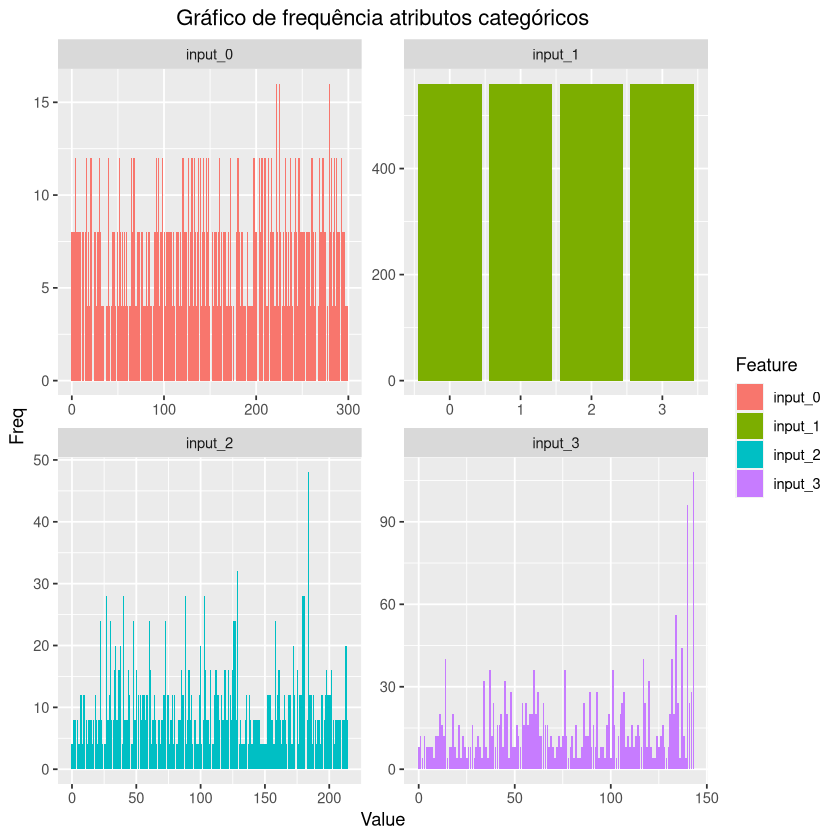

In [16]:
ggplot(sdata_num, aes(x = Value, y = Freq, fill = Feature)) +
  geom_bar(stat = "identity") +
  facet_wrap(vars(Feature), scales = "free") +
  ggtitle("Gráfico de frequência atributos categóricos") +
  theme(plot.title = element_text(hjust = 0.5))


── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = ""),
  input_45_1 = col_logical(),
  input_46_1 = col_logical(),
  input_47_1 = col_logical(),
  input_48_1 = col_logical(),
  input_53_1 = col_logical(),
  input_54_1 = col_logical(),
  input_55_1 = col_logical(),
  input_56_1 = col_logical(),
  input_85_1 = col_logical(),
  input_86_1 = col_logical(),
  input_87_1 = col_logical(),
  input_88_1 = col_logical(),
  input_109_1 = col_logical(),
  input_146_1 = col_logical(),
  input_173_1 = col_logical(),
  input_174_1 = col_logical(),
  input_175_1 = col_logical(),
  input_176_1 = col_logical(),
  input_177_1 = col_logical()
  # ... with 849 more columns
)
ℹ Use `spec()` for the full column specifications.




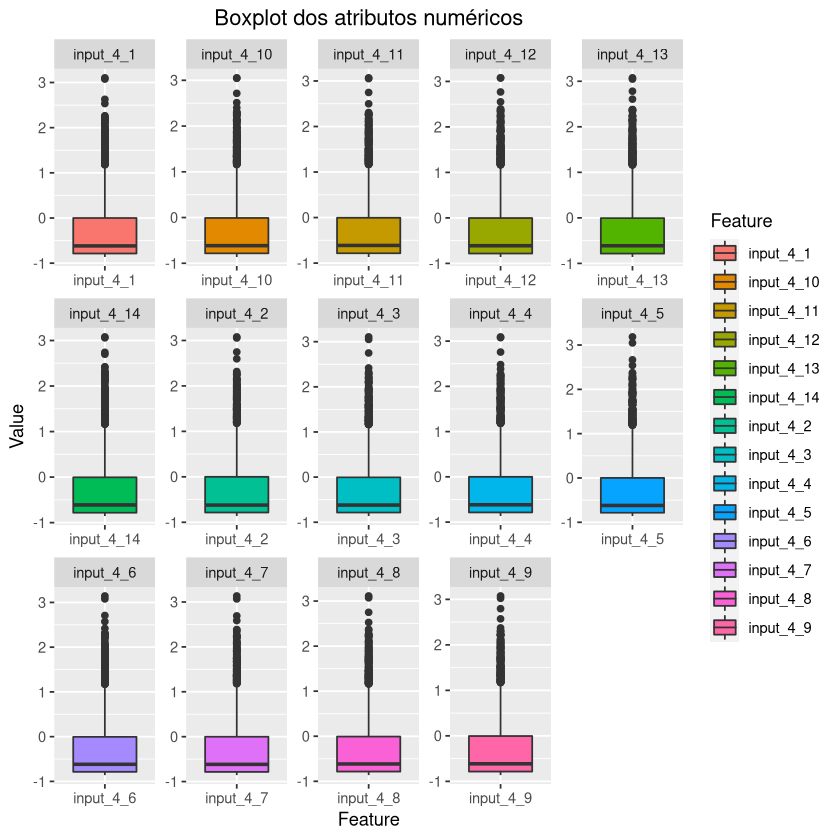

In [19]:
dataset %>%
    type_convert() %>%
    select(starts_with("input_4_")) %>%
    pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
        ggplot(aes(Value, x = Feature, fill = Feature)) +
               geom_boxplot() +
               ggtitle("Boxplot dos atributos numéricos") +
               theme(plot.title = element_text(hjust = 0.5)) +
               facet_wrap(vars(Feature), scales = "free", ncol=5)

In [7]:
sum(is.na(dataset$input_46_13))

[1] 2240

## Tabela de Estatísticas

In [23]:
# dataset %>%
#     type_convert() %>%
#     select(starts_with("input") | starts_with("output")) %>%
#     pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
#     group_by(Feature) %>%
#     summarize(
#               Min = min(Value),
#               Max = max(Value),
#               Range = max(Value) - min(Value),
#               Q1 = quantile(Value, .25),
#               Q2 = quantile(Value, .50),
#               Q3 = quantile(Value, .75),
#               Std = sd(Value),
#               Mean = mean(Value),
#               Var = var(Value),
#               Skew = skewness(Value),
#               Kurt = kurtosis(Value))

dataset %>%
    type_convert() %>%
    select(starts_with("input") | starts_with("output")) %>%
    pivot_longer(everything(), names_to = "Feature", values_to = "Value") %>%
    group_by(Feature) %>%
    summarize(Min = min(Value, na.rm = (sum(is.na(Value)) != nrow(dataset))),
              Max = max(Value, na.rm = (sum(is.na(Value)) != nrow(dataset))),
              Range = max(Value, na.rm = (sum(is.na(Value)) != nrow(dataset))) - min(Value, na.rm = (sum(is.na(Value)) != nrow(dataset))),
              PerNA = sum(is.na(Value) * 100 / nrow(dataset)),
              Q1 = quantile(Value, .25, na.rm = TRUE),
              Q2 = quantile(Value, .50, na.rm = TRUE),
              Q3 = quantile(Value, .75, na.rm = TRUE),
              Std = sd(Value, na.rm = TRUE),
              Mean = mean(Value, na.rm = TRUE),
              Var = var(Value, na.rm = TRUE),
              Skew = skewness(Value, na.rm = TRUE),
              Kurt = kurtosis(Value, na.rm = TRUE)) %>%
    write.csv("teste.csv")


── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = ""),
  input_45_1 = col_logical(),
  input_46_1 = col_logical(),
  input_47_1 = col_logical(),
  input_48_1 = col_logical(),
  input_53_1 = col_logical(),
  input_54_1 = col_logical(),
  input_55_1 = col_logical(),
  input_56_1 = col_logical(),
  input_85_1 = col_logical(),
  input_86_1 = col_logical(),
  input_87_1 = col_logical(),
  input_88_1 = col_logical(),
  input_109_1 = col_logical(),
  input_146_1 = col_logical(),
  input_173_1 = col_logical(),
  input_174_1 = col_logical(),
  input_175_1 = col_logical(),
  input_176_1 = col_logical(),
  input_177_1 = col_logical()
  # ... with 849 more columns
)
ℹ Use `spec()` for the full column specifications.


`summarise()` ungrouping output (o

[1] 2240